In [20]:
import numpy as np
import pandas as pd
import scipy 
import os
import random
import keras 
from sklearn.preprocessing import LabelEncoder
%pylab inline
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import model_from_json
from keras.models import load_model

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# load csv file 
data_dir = "/Users/xiadylan/Downloads"

train = pd.read_csv(os.path.join(data_dir,"Age_Detection_train","train.csv"))
test = pd.read_csv(os.path.join(data_dir,'Age_Detection_test','test.csv'))

13479


1499.jpg
Age:  OLD


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


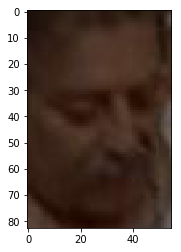

In [5]:
# randomly choose image and print it
i = random.choice(train.index)
print(i)
print("\n")

img_name = train['ID'][i]
print(img_name)

img = scipy.misc.imread(os.path.join(data_dir,'Age_Detection_train','Train',img_name))
print("Age: ",train['Class'][i])

imshow(img)

In [7]:
# how to handle variations in shape
# We can do this by simply resizing the image. Let us load all the images and resize them into a single numpy array

In [7]:
temp = []

for img_name in train.ID:
    img_path = os.path.join(data_dir,'Age_Detection_train', 'Train', img_name)
    img = scipy.misc.imread(img_path)
    img = scipy.misc.imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [8]:
train_x.shape

(19906, 32, 32, 3)

In [10]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir,'Age_Detection_test','Test',img_name)
    img = scipy.misc.imread(img_path)
    img = scipy.misc.imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [11]:
# we can normalize our images. Normalizing the images will make our train faster.
train_x = train_x / 255
test_x = test_x / 255

In [12]:
# most of the actors are middle age
train['Class'].value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [13]:
# Before creating something substantial, let us bring our target variable in shape. 
# We will convert our target into dummy columns so that it will be easier for our model to ingest it.
label_encode = LabelEncoder()
train_y = label_encode.fit_transform(train['Class'])
train_y = keras.utils.np_utils.to_categorical(train_y)

In [49]:
input_num_units = (32, 32, 3)
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
hidden_num_units = 50
output_num_units = 3

epochs = 10
batch_size = 128

In [50]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                153650    
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
__________

In [52]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/10
19906/19906 [==============================] - 1s - loss: 1.0137 - acc: 0.5282     
Epoch 2/10
19906/19906 [==============================] - 1s - loss: 0.9514 - acc: 0.5428     
Epoch 3/10
19906/19906 [==============================] - 1s - loss: 0.9453 - acc: 0.5428     
Epoch 4/10
19906/19906 [==============================] - 1s - loss: 0.9380 - acc: 0.5428     
Epoch 5/10
19906/19906 [==============================] - 1s - loss: 0.9221 - acc: 0.5500     
Epoch 6/10
19906/19906 [==============================] - 1s - loss: 0.8957 - acc: 0.5962     
Epoch 7/10
19906/19906 [==============================] - 1s - loss: 0.8736 - acc: 0.6100     
Epoch 8/10
19906/19906 [==============================] - 1s - loss: 0.8603 - acc: 0.6133     
Epoch 9/10
19906/19906 [==============================] - 1s - loss: 0.8530 - acc: 0.6176     
Epoch 10/10
19906/19906 [==============================] - 1s - loss: 0.8444 - acc: 0.6217     


In [24]:
# But we still haven’t validated it. 
# Validation is necessary if we want to ensure that 
#our model will perform well on both the data it is training on and on a new testing data

In [18]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 5s - loss: 0.8031 - acc: 0.6328 - val_loss: 0.7838 - val_acc: 0.6391
Epoch 2/5
15924/15924 [==============================] - 5s - loss: 0.7969 - acc: 0.6362 - val_loss: 0.8123 - val_acc: 0.6246
Epoch 3/5
15924/15924 [==============================] - 4s - loss: 0.7913 - acc: 0.6400 - val_loss: 0.7754 - val_acc: 0.6434
Epoch 4/5
15924/15924 [==============================] - 4s - loss: 0.7875 - acc: 0.6448 - val_loss: 0.8235 - val_acc: 0.6115
Epoch 5/5
15924/15924 [==============================] - 4s - loss: 0.7859 - acc: 0.6431 - val_loss: 0.8555 - val_acc: 0.5748


In [22]:
test = pd.read_csv(os.path.join(data_dir,'Age_Detection_test','test.csv'))
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [23]:
pred = model.predict_classes(test_x)
pred = label_encode.inverse_transform(pred)


test['Class'] = pred

6464/6636 [============================>.] - ETA: 0s

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


19904/19906 [============================>.] - ETA: 0s Original:  MIDDLE Predicted:  MIDDLE


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


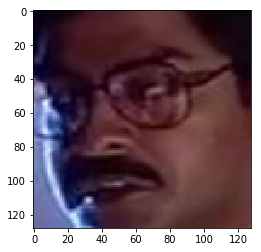

In [55]:
i = random.choice(train.index)
img_name = train['ID'][i]


img = scipy.misc.imread(os.path.join(data_dir,'Age_Detection_train', 'Train', img_name)).astype('float32')
imshow(scipy.misc.imresize(img,(128,128)))
pred = model.predict_classes(train_x)
print(' Original: ',train['Class'][i],'Predicted: ',label_encode.inverse_transform(pred[i]))

In [57]:
label_encode = LabelEncoder()
train_y = label_encode.fit_transform(train['Class'])
train_y = keras.utils.np_utils.to_categorical(train_y)

model = Sequential()
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_num_units, padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=64)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
__________

In [40]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [41]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
